In [1]:
#載入套件
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import seaborn as sns
#不用科學記號顯示
pd.set_option('display.float_format',lambda x : '%.2f' % x)

In [2]:
#import train_data and test_data
train_dataset=pd.read_csv("train_skl.csv")
test_dataset=pd.read_csv("test_skl.csv")
vaild_dataset=pd.read_csv("vaild_ans_skl.csv")
train_dataset.head()

,Id,City,UseYear,RoadWide,RegisterReason,BuildTotalLevel,BuildLevel,PurposeCode,buildRate,UsedState,StallPrice,StallNum,StallAreaSize,TotalAreaSize,RegisterPurpose1,RegisterPurpose2,RegisterPurpose3,landSize,IdenPrice
0,1,1,16,12.00,2,4,1,30,0.00,1,0.00,0,0.00,124.07,34.21,3.32,0.00,47.20,23146940.00
1,2,9,44,6.00,2,4,2,35,0.00,4,0.00,0,0.00,24.68,7.47,0.00,0.00,11.40,7157200.00
2,3,1,25,6.00,2,6,2,35,8.00,1,1100000.00,2,7.64,49.41,12.45,1.36,1.14,11.44,7276250.00
3,4,3,14,6.00,2,4,1,35,0.00,1,0.00,0,0.00,51.52,14.06,1.52,0.00,22.86,7952880.00
4,5,3,4,12.00,2,4,1,10,0.00,4,0.00,0,0.00,84.35,23.43,2.09,0.00,29.66,18963150.00


In [3]:
#show train col info
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1541 entries, 0 to 1540
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1541 non-null   int64  
 1   City              1541 non-null   int64  
 2   UseYear           1541 non-null   int64  
 3   RoadWide          1541 non-null   float64
 4   RegisterReason    1541 non-null   int64  
 5   BuildTotalLevel   1541 non-null   int64  
 6   BuildLevel        1541 non-null   int64  
 7   PurposeCode       1541 non-null   int64  
 8   buildRate         1541 non-null   float64
 9   UsedState         1541 non-null   int64  
 10  StallPrice        1541 non-null   float64
 11  StallNum          1541 non-null   int64  
 12  StallAreaSize     1541 non-null   float64
 13  TotalAreaSize     1541 non-null   float64
 14  RegisterPurpose1  1541 non-null   float64
 15  RegisterPurpose2  1541 non-null   float64
 16  RegisterPurpose3  1541 non-null   float64


In [4]:
#train_data
print (train_dataset.shape)
train_dataset.describe()

(1541, 19)


,Id,City,UseYear,RoadWide,RegisterReason,BuildTotalLevel,BuildLevel,PurposeCode,buildRate,UsedState,StallPrice,StallNum,StallAreaSize,TotalAreaSize,RegisterPurpose1,RegisterPurpose2,RegisterPurpose3,landSize,IdenPrice
count,1541.00,1541.00,1541.00,1541.00,1541.00,1541.00,1541.00,1541.00,1541.00,1541.00,1541.00,1541.00,1541.00,1541.00,1541.00,1541.00,1541.00,1541.00,1541.00
mean,771.00,4.79,27.89,10.94,2.47,7.44,3.29,29.69,9.59,2.21,225752.76,0.22,1.62,38.18,12.23,1.02,4.42,17.60,11568070.45
std,444.99,3.63,11.32,7.26,1.32,5.60,3.65,9.45,13.06,6.63,593798.70,0.48,4.24,28.52,10.14,1.08,61.32,21.67,11142610.65
min,1.00,1.00,0.00,1.00,1.00,0.00,1.00,10.00,0.00,1.00,0.00,0.00,0.00,0.00,2.43,0.00,0.00,0.10,2005200.00
25%,386.00,1.00,21.00,6.00,2.00,4.00,1.00,30.00,0.00,1.00,0.00,0.00,0.00,25.29,7.23,0.00,0.00,6.50,5246100.00
50%,771.00,3.00,26.00,8.00,2.00,5.00,1.00,35.00,0.00,1.00,0.00,0.00,0.00,34.18,9.19,0.94,0.00,10.74,8038330.00
75%,1156.00,9.00,37.00,12.00,2.00,12.00,4.00,35.00,19.00,1.00,0.00,0.00,0.00,46.13,13.80,1.38,2.12,25.11,12917400.00
max,1541.00,10.00,60.00,70.00,6.00,31.00,26.00,35.00,99.00,70.00,7500000.00,5.00,60.00,654.45,188.38,17.34,1451.28,552.97,77086800.00


In [5]:
#missing value
missdf=pd.concat([train_dataset.isnull().sum(),test_dataset.isnull().sum()],keys=['train_data', 'test_data'],axis =1)
missdf[missdf.sum(axis=1)>0.]

,train_data,test_data


In [6]:
#TotalValue
train_dataset["IdenPrice"].describe()

count       1541.00
mean    11568070.45
std     11142610.65
min      2005200.00
25%      5246100.00
50%      8038330.00
75%     12917400.00
max     77086800.00
Name: IdenPrice, dtype: float64

In [7]:
#correlation
numeric_features=train_dataset.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                    int64
City                  int64
UseYear               int64
RoadWide            float64
RegisterReason        int64
BuildTotalLevel       int64
BuildLevel            int64
PurposeCode           int64
buildRate           float64
UsedState             int64
StallPrice          float64
StallNum              int64
StallAreaSize       float64
TotalAreaSize       float64
RegisterPurpose1    float64
RegisterPurpose2    float64
RegisterPurpose3    float64
landSize            float64
IdenPrice           float64
dtype: object

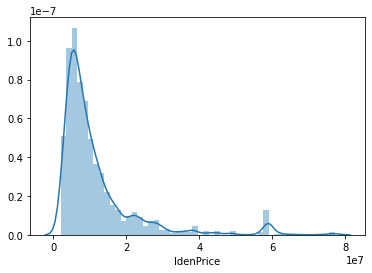

In [8]:
sns.distplot(train_dataset["IdenPrice"])

In [9]:
corr=numeric_features.corr()
print (corr['IdenPrice'].sort_values()[:])

PurposeCode        -0.07
buildRate          -0.05
RegisterPurpose3   -0.02
RegisterReason     -0.01
BuildTotalLevel     0.00
BuildLevel          0.01
UsedState           0.03
UseYear             0.04
StallNum            0.04
Id                  0.08
StallAreaSize       0.10
RegisterPurpose2    0.15
TotalAreaSize       0.16
StallPrice          0.20
landSize            0.21
RoadWide            0.23
City                0.29
RegisterPurpose1    0.64
IdenPrice           1.00
Name: IdenPrice, dtype: float64


Index(['IdenPrice', 'RegisterPurpose1', 'City', 'RoadWide', 'landSize',
       'StallPrice', 'TotalAreaSize', 'RegisterPurpose2', 'StallAreaSize',
       'Id', 'StallNum', 'UseYear', 'UsedState', 'BuildLevel',
       'BuildTotalLevel'],
      dtype='object')


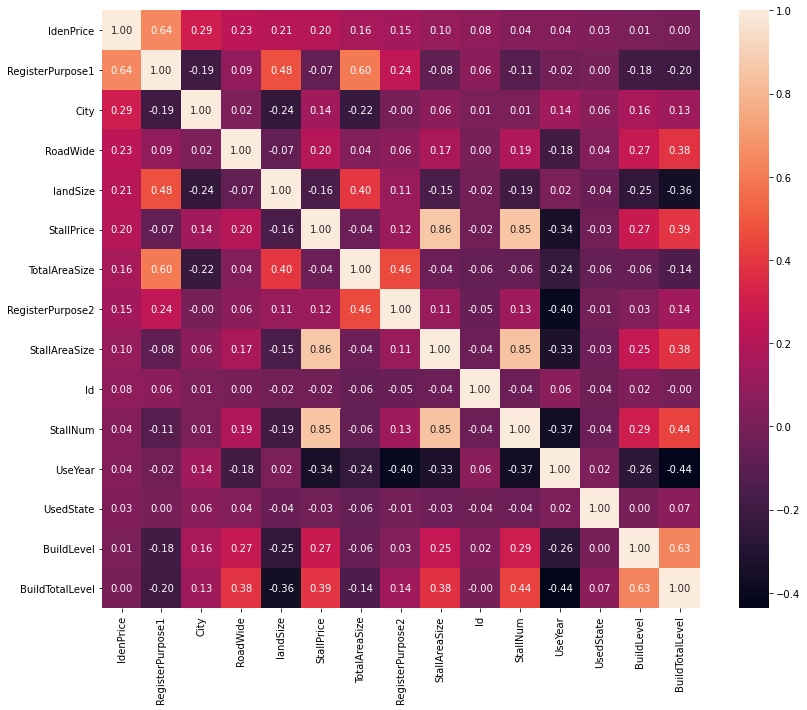

In [10]:
#相關性分析
corrmat = train_dataset.corr()
k = 15
cols = corrmat.nlargest(k, 'IdenPrice')['IdenPrice'].index
print(cols)
cm = train_dataset[cols].corr()
f, ax = plt.subplots(figsize=(14, 11))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True,fmt='.2f')
plt.show()

In [11]:
#train model
from sklearn.model_selection import train_test_split
X1=train_dataset.select_dtypes(include=[np.number]).fillna(0)
X=X1.drop(['IdenPrice','Id'],axis=1)
y=train_dataset.IdenPrice

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(1232, 17)
(309, 17)
(1232,)
(309,)


In [13]:
#linear reg train
from sklearn import linear_model
lr=linear_model.LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred=lr.predict(X_test)

Text(0, 0.5, 'Actual')

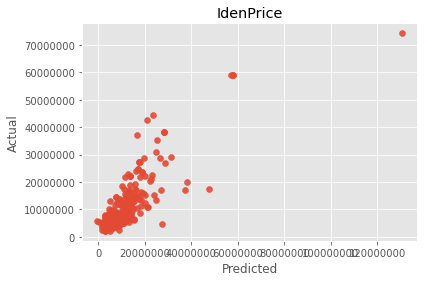

In [15]:
plt.style.use("ggplot")
actual_value=y_test
plt.scatter(y_pred,actual_value,alpha=0.9)
plt.rcParams["figure.figsize"] =(15, 10)
plt.ticklabel_format(style='plain')
plt.title("IdenPrice")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [16]:
from sklearn.metrics import mean_squared_error

In [19]:
#RSME
print ('RSME is : ',np.sqrt(mean_squared_error(y_test,y_pred)))

RSME is :  6145701.829991636


In [20]:
#R Squared
print ('R Squared is : ',1- mean_squared_error(y_test,y_pred)/ np.var(y_test))

R Squared is :  0.5778763443888119


In [21]:
#train model with xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [22]:
model= XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [23]:
y_pred=model.predict(X_test)

Text(0, 0.5, 'Actual')

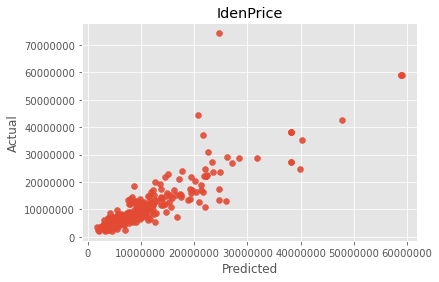

In [24]:
actual_value=y_test
plt.scatter(y_pred,actual_value,alpha=0.9)
plt.rcParams["figure.figsize"] =(15, 10)
plt.ticklabel_format(style='plain')
plt.title("IdenPrice")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [25]:
#RSME
print ('RSME is : ',np.sqrt(mean_squared_error(y_test,y_pred)))

RSME is :  4440034.114281863


In [26]:
#R Squared
print ('R Squared is : ',1- mean_squared_error(y_test,y_pred)/ np.var(y_test))

R Squared is :  0.779672182371698


In [27]:
print(model.feature_importances_)

[0.15861186 0.0165633  0.01785644 0.00410999 0.0294588  0.01578988
 0.00539762 0.0103315  0.01587616 0.09728771 0.01269441 0.00136775
 0.07485051 0.43602148 0.01931804 0.07422361 0.01024099]


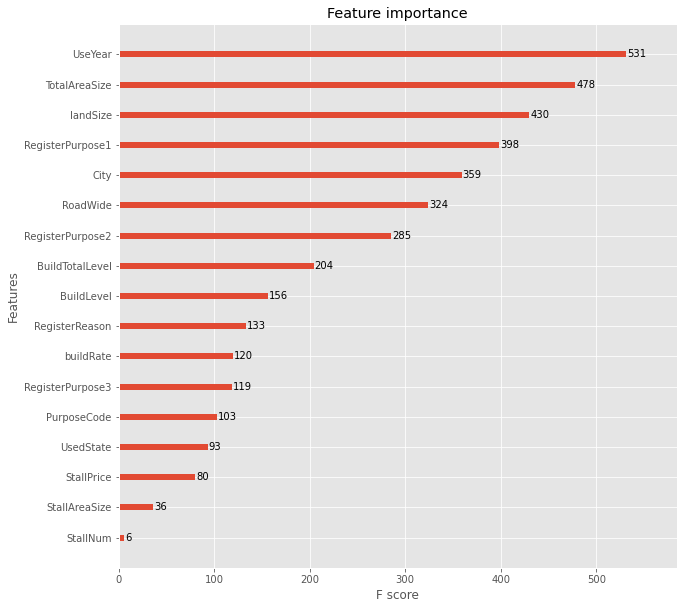

In [28]:
from xgboost import plot_importance
ax=plot_importance(model)
fig=ax.figure
fig.set_size_inches(10,10)

In [29]:
answer=pd.DataFrame()
answer['Id']=test_dataset.Id
feats=test_dataset.select_dtypes(include=[np.number]).drop(["Id"],axis=1).fillna(0)
feats
pred_f=model.predict(feats)

#exp()
pred_result=pred_f
print (pred_f[:5])
print (pred_result[:5])

[16187056.  9145830. 10086992. 37307340. 15404772.]
[16187056.  9145830. 10086992. 37307340. 15404772.]


In [30]:
answer['IdenPrice']=pred_result
answer.head()

,Id,IdenPrice
0,1,16187056.00
1,2,9145830.00
2,3,10086992.00
3,4,37307340.00
4,5,15404772.00


In [36]:
vaild_dataset.IdenPrice

0      3896900.00
1     25511500.00
2      5866700.00
3     10401600.00
4     37292800.00
          ...    
826   16247200.00
827   10447400.00
828   14767500.00
829   15868000.00
830    9180600.00
Name: IdenPrice, Length: 831, dtype: float64

ValueError: x and y must be the same size

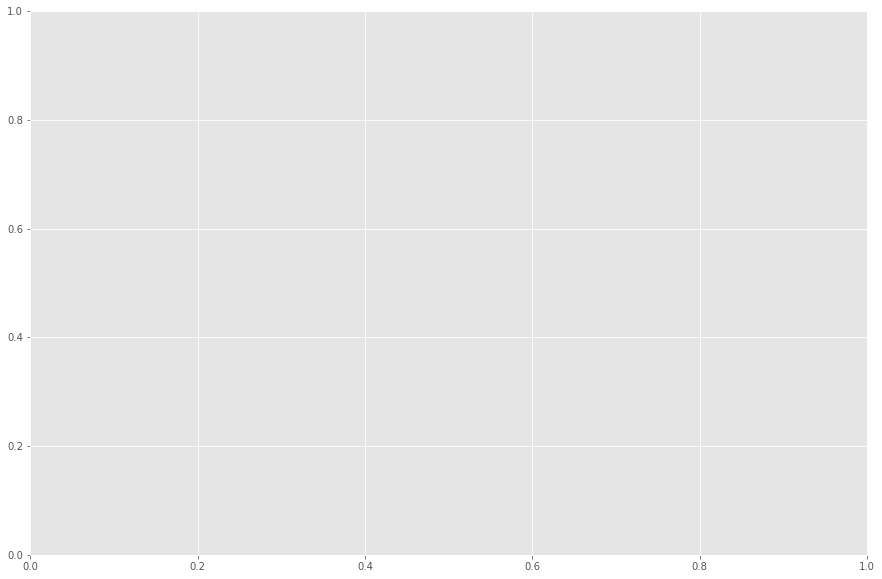

In [32]:
vaild_data =vaild_dataset.IdenPrice
plt.scatter(pred_result,vaild_data,alpha=0.9)
plt.title("IdenPrice")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [33]:
#RSME
print ('RSME is : ',np.sqrt(mean_squared_error(vaild_data,pred_result)))

ValueError: Found input variables with inconsistent numbers of samples: [831, 583]

In [34]:
#R Squared
print ('R Squared is : ',1- mean_squared_error(vaild_data,pred_result)/ np.var(vaild_data))

ValueError: Found input variables with inconsistent numbers of samples: [831, 583]

In [35]:
#export the result file
answer.to_csv("Result_skl.csv",index=False)

In [ ]:
vaild_dataset.head

In [ ]:
vaild_data =vaild_dataset.IdenPrice
plt.scatter(vaild_dataset.id,np.log(vaild_dataset.IdenPrice))
plt.xlabel("y_pred:Predicted price")
plt.ylabel("actual_value:SalePrice")